We can easily see how modeling random variables can come in handy when dealing with finance; financial assets are often expressed as moving according to deterministic and random patterns, with the random patterns being expressed with random variables. To do this we would 'sample' from the random variable at each timestep, then move the financial instrument by that amount. This analysis is used because much of the motion in assets is unexplained using deterministic models.

Each random variable follows a probability distribution, a function which describes it.

For discrete random variables, we can express $p(x) = P(X = x)$ in shorthand. This is also known as the **probability mass function** (PMF). For continuous random variables we cannot use a PMF, as we will cover later, so we must use a **probability density function** (PDF).

For each probability distribution function, we also have a **cumulative distribution function** (CDF). This is defined as $P(X \\leq x)$, the probability that the random variable is less than or equal to a particular value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

A discrete random variable is one with a countable number of outcomes. Each of these outcomes has a separate probability associated with it

The basic unit of a discrete random variable is its **probability mass function** (PMF), another name for the probability function $p(x)$. The PMF, or probability function, gives a probability, a mass, to each point in the domain of the probability distribution.

has two main properties

$0 \\leq p(x) \\leq 1$ because all probabilities are in the interval $[0, 1]$

The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.random_integers(self.low, self.high, numberOfSamples)
        return samples

Uniform Distribution

The most basic type of probability distribution is the uniform distribution. With a discrete uniform distribution, equal weight is assigned to all outcomes.

Dice is good example



C:\Users\ncroc\AppData\Local\Temp\ipykernel_26604\2845756674.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  samples = np.random.random_integers(self.low, self.high, numberOfSamples)


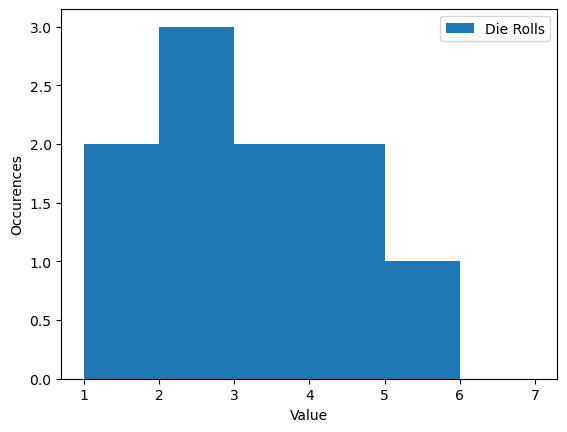

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Looks uneven due to low data sample. the more data the smoother it will get

C:\Users\ncroc\AppData\Local\Temp\ipykernel_26604\2845756674.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  samples = np.random.random_integers(self.low, self.high, numberOfSamples)


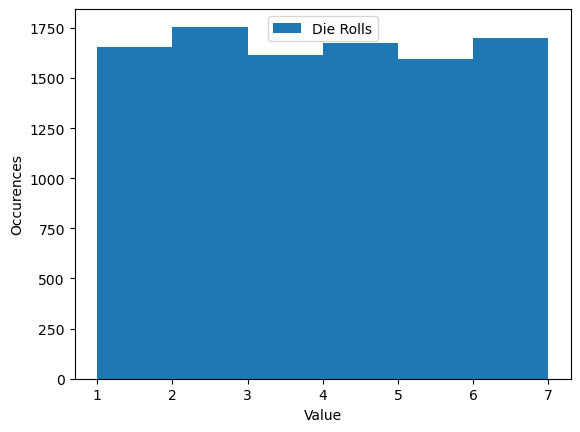

In [4]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Binomial Distribution

A binomial distribution is used to describe successes and failures. This can be very useful in an investment context as many of our choices tend to be binary like this. When we take a single success/failure trial, we call it a Bernoulli trial. With the Bernoulli random variable, we have two possible outcomes:

$$p(1) = P(Y = 1) = p \\ \\ \\ \\ \\ \\ \\ p(0) = P(Y = 0) = 1-p$$

We consider $Y$ taking on a value of $1$ to be a success, so the probability of a success occurring in a single trial is $p$.

A binomial distribution takes a set of $n$ Bernoulli trials. As such, we can have somewhere between $0$ and $n$ successes. Each trial has the same probability of success, $p$, and all of the trials are independent of each other. We can describe the entire binomial random variable using only $n$ and $p$, signified by the notation $X$ **~** $B(n, p)$. This states that $X$ is a binomial random variable with parameters $n$ and $p$

In order to define the probability function of a binomial random variable, we must be able to choose some number of successes out of the total number of trials. This idea lends itself easily to the combination idea in combinatorics. A combination describes all possible ways of selecting items out of a collection such that order does not matter. For example, if we have $6$ pairs of socks and we want to choose $2$ of them, we would write the total number of combinations possible as $\\binom{6}{2}$. This is expanded as

$$\\binom{n}{x} = \\frac{n!}{(n-x)! \\ x!}$$



In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

Take the example of a stock price moving up or down, each with probability $p = 0.5$. We can consider a move up, or $U$, to be a success and a move down, or $D$ to be a failure. With this, we can analyze the probability of each event using a binomial random variable. We will also consider an $n$-value of $5$ for $5$ observations of the stock price over time. The following table shows the probability of each event:

Now we will draw some samples for the parameters above, where $X$ **~** $B(5, 0.50)$



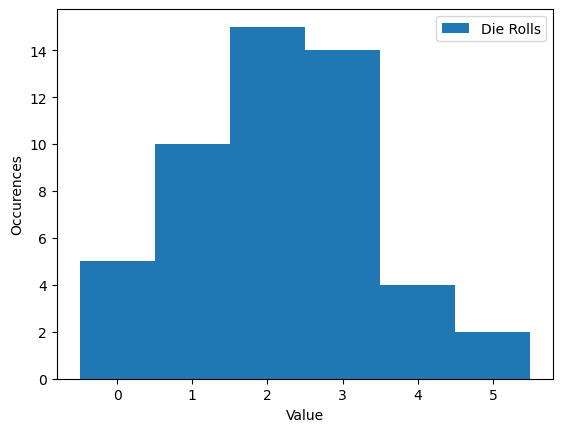

In [6]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

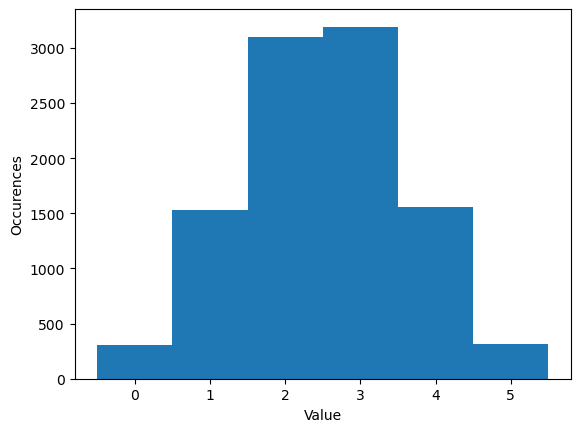

In [7]:
#  the more samples that you take, the more consistent your resulting distribution looks:

plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

Say that we changed our parameters so that $p = 0.25$. This makes it so that $P(X = 0) = 0.23730$, skewing our distribution much more towards lower values. We can see this easily in the following graph:

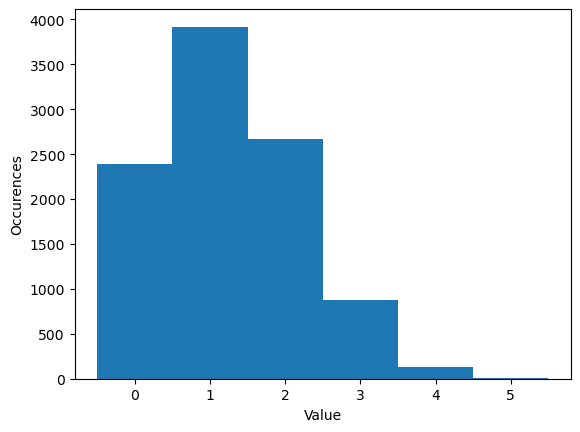

In [8]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

# Continuous Random Variables

Continuous random variables differ from discrete random variables in that continuous ones can take infinitely many outcomes. They cannot be counted or described as a list. As such, it means very little when we assign individual probabilities to outcomes. Because there are infinitely many outcomes, the probability of hitting any individual outcome has a probability of 0.

We can resolve this issue by instead taking probabilities across ranges of outcomes. This is managed by using calculus, though in order to use our sampling techniques here we do not actually have to use any. With a continuous random variable $P(X = 0)$ is meaningless. Instead we would look for something more like $P(-1 < X < 1)$. For continous random variables, rather than using a PMF, we define a **probability density function** (PDF), $f_X(x)$, such that we can say:

$$P(a < X < b) = \\int_a^b f_X(x)dx$$

Similar to our requirement for discrete distributions that all probabilities add to $1$, here we require that:

$f_X(x) \\geq 0$ for all values of $X$

$P(-\\infty < X < \\infty) = \\int_{-\\infty}^{\\infty} f_X(x) dx = 1$

It is worth noting that because the probability at an individual point with a continuous distribution is $0$, the probabilities at the endpoints of a range are $0$. Hence, $P(a \\leq X \\leq b) = P(a < X \\leq b) = P(a \\leq X < B) = P(a < X < b)$. If we integrate the PDF across all possibilities, over the total possible range, the value should be $1$


In [9]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

# Uniform Distribution

The uniform distribution can also be defined within the framework of a continous random variable. We take $a$ and $b$ to be constant, where $b$ is the highest possible value and $a$ is the lowest possible value that the outcome can obtain. Then the PDF of a uniform random variable is:

$$f(x) = \\begin{cases}\\frac{1}{b - a} & \\text{for $a < x < b$} \\ 0 & \\text{otherwise}\\end{cases}$$

Since this function is defined on a continuous interval, the PDF covers all values between $a$ and $b$. Here we have a plot of the PDF (feel free to vary the values of $a$ and $b$):

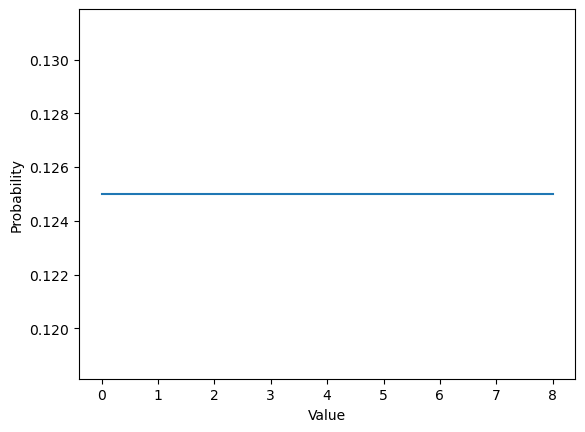

In [10]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

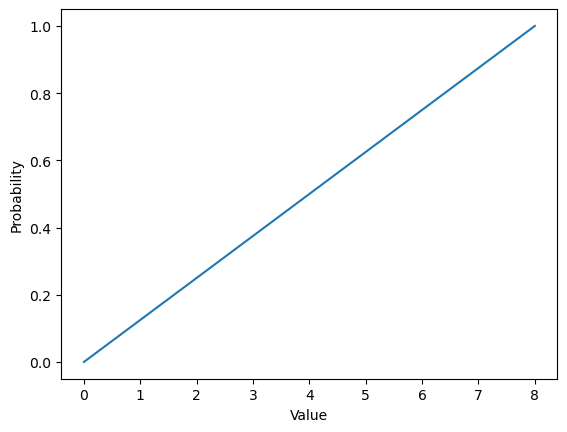

In [11]:
# sloped uniform
y = [(i - a)/(b - a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

# Normal Distribution

The normal distribution is a very common and important distribution in statistics. Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT), which states that large enough samples of independent trials are normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well. For example, as covered in the pairs trading notebook, we can search for stock pairs that are cointegrated, and bet on the direction the spread between them will change based on a normal distribution.



In [12]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

 In modern portfolio theory, stock returns are generally assumed to follow a normal distribution. One major characteristic of a normal random variable is that a linear combination of two or more normal random variables is another normal random variable. This is useful for considering mean returns and variance of a portfolio of multiple stocks. Up until this point, we have only considered single variable, or univariate, probability distributions. When we want to describe random variables at once, as in the case of observing multiple stocks, we can instead look at a multivariate distribution. A multivariate normal distribution is described entirely by the means of each variable, their variances, and the distinct correlations between each and every pair of variables. This is important when determining characteristics of portfolios because the variance of the overall portfolio depends on both the variances of its securities and the correlations between them.

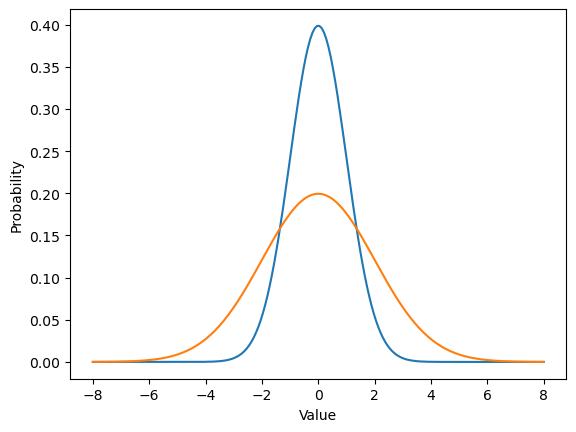

In [13]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

When considering the mean and variance of a sample distribution, we like to look at different confidence intervals around the mean.

Using the central limit theorem, we can standardize different random variables so that they become normal random variables. A very common tool in statistics is a standard normal probability table, used for looking up the values of the standard normal CDF for given values of $x$. By changing random variables into a standard normal we can simply check these tables for probability values. We standardize a random variable $X$ by subtracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

Let's look at the case where $X$ **~** $B(n, p)$ is a binomial random variable. In the case of a binomial random variable, the mean is $\\mu = np$ and the variance is $\\sigma^2 = np(1 - p)$

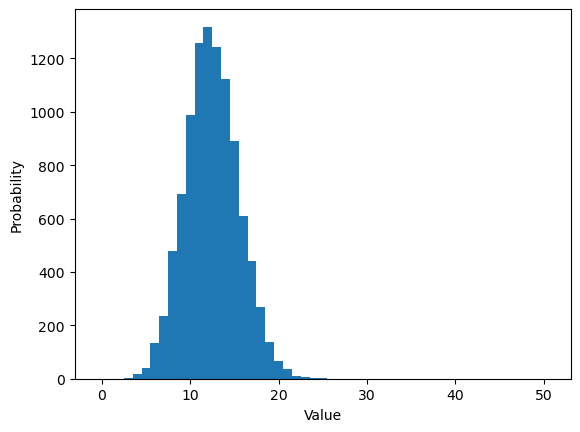

In [14]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

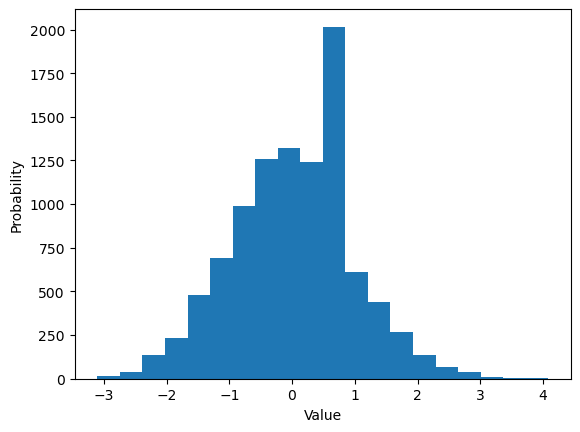

In [15]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

The idea that we can standardize random variables is very important. By changing a random variable to a distribution that we are more familiar with, the standard normal distribution, we can easily answer any probability questions that we have about the original variable. This is dependent, however, on having a large enough sample size.

Let's assume that stock returns are normally distributed. Say that $Y$ is the price of a stock. We will simulate its returns and plot it.

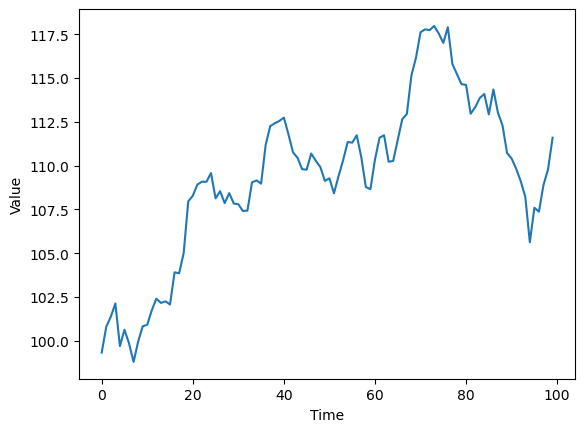

In [16]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

Say that we have some other stock, $Z$, and that we have a portfolio of $Y$ and $Z$, called $W$

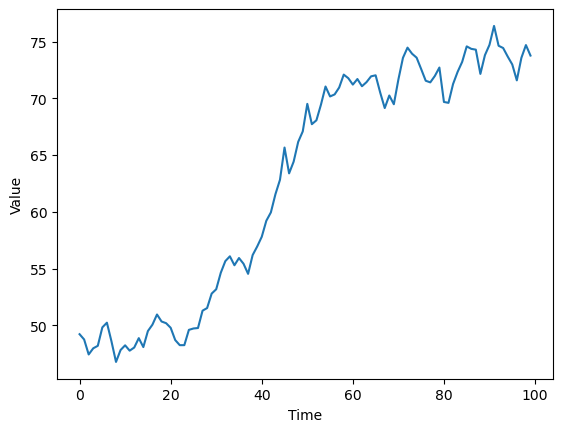

In [17]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

We construct $W$ by taking a weighted average of $Y$ and $Z$ based on their quantity.

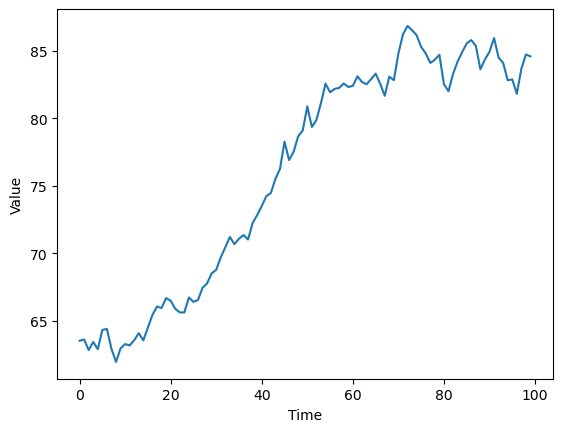

In [18]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

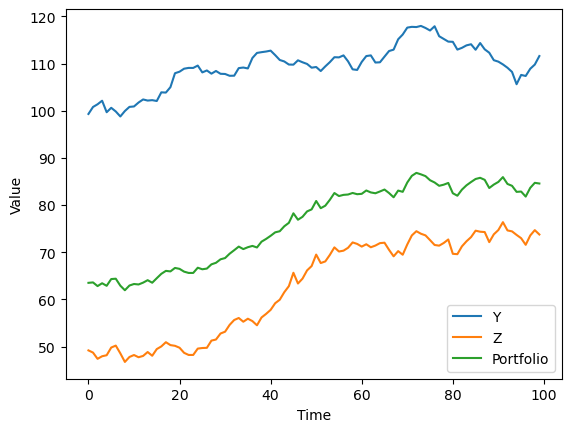

In [19]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

Note how the returns of our portfolio, $W$, are also normally distributed


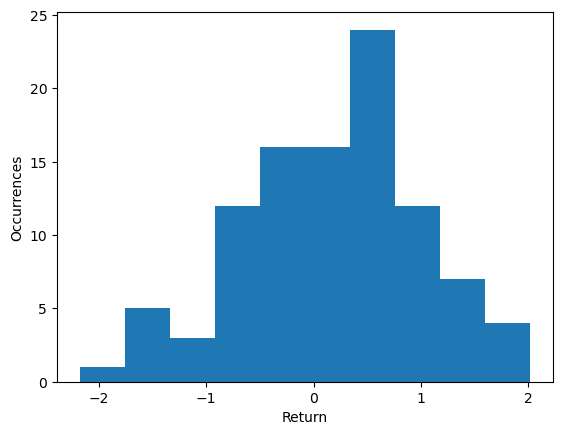

In [20]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

# Fitting a Distribution

Now we will attempt to fit a probability distribution to the returns of a stock. We will take the returns of Tesla and try to fit a normal distribution to them. The first thing to check is whether the returns actually exhibit properties of a normal distribution. For this purpose, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.



In [21]:
import pandas_datareader as pdr

# Use an ETF that tracks 3-month T-bills as our risk-free rate of return
data_tsla = pdr.get_data_yahoo('TSLA')

The JB test p-value is:  1.3621698837616982e-269
We reject the hypothesis that the data are normally distributed  True
The skewness of the returns is:  0.3899408039071253
The kurtosis of the returns is:  7.797240865111457


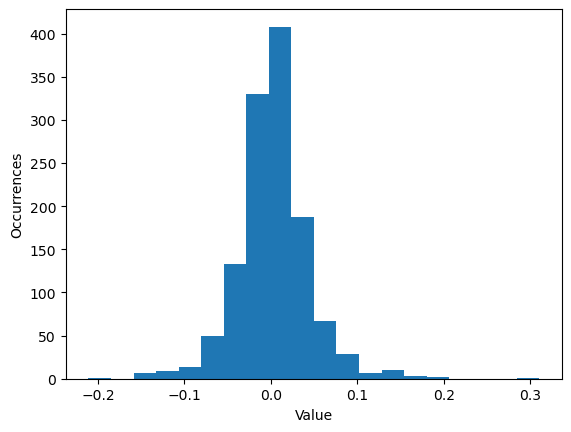

In [23]:
# Take the daily returns
returns = data_tsla["Open"].pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print("The JB test p-value is: ", p_value)
print("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print("The skewness of the returns is: ", skewness)
print("The kurtosis of the returns is: ", kurtosis)
plt.hist(returns, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

The low p-value of the JB test leads us to *reject* the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of $3$).

We will proceed from here assuming that the returns are normally distributed so that we can go through the steps of fitting a distribution. Next we calculate the sample mean and standard deviation of the series.

In [24]:
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

Now let's see how a theoretical normal curve fits against the actual values.

AttributeError: 'Rectangle' object has no property 'normed'

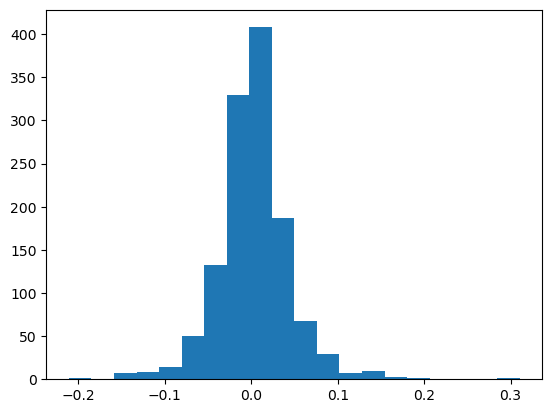

In [25]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) *
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins = 20, normed = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

Our theoretical curve for the returns has a substantially lower peak than the actual values, which makes sense because the returns are not actually normally distributed. This is again due to the kurtosis of the normal distribution. The returns have a kurtosis value of around $5.20$, while the kurtosis of the normal distribution is $3$. A higher kurtosis leads to a higher peak. A major reason why it is so difficult to model prices and returns is due to the underlying probability distributions. A lot of theories and frameworks in finance require that data be somehow related to the normal distribution. This is a major reason for why the normal distribution seems to be so prevalent. For example, the basis of the Black-Scholes pricing model for options assumes that stock prices are log-normally distributed. However, it is exceedingly difficult to find real-world data that fits nicely into the assumptions of normality. When actually implementing a strategy, you should not assume that data follows a distribution that it demonstrably does not unless there is a very good reason for it

Generally, when trying to fit a probability distribution to real-world values, we should have a particular distribution (or distributions) in mind. There are a variety of tests for different distributions that we can apply to see what might be the best fit. In additon, as more information becomes available, it will become necessary to update the sample mean and standard deviation or maybe even to find a different distribution to more accurately reflect the new information. The shape of the distribution will change accordingly.